# Linear Regression - Predicting House Prices 

Housing data for the city of Ames, Iowa, United States, from the years 2006 to 2010, was used to train a Linear Regression model to predict the sale price of a house, based on its features.

We'll start by importing some of the libraries we'll need, as well as briefly exploring the data, and then setting up a pipeline of functions that will allow us to quickly iterate on different models.

The dataset can be found [here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt). This dataset was originally compiled by Dean De Cock for the primary purpose of having a high quality dataset for regression.

Information on the columns in the dataframe can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Introduction

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

pd.options.display.max_columns = 999

houses = pd.read_csv('AmesHousing.tsv', delimiter = '\t')

houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Setting up the necessary functions

Now, we'll create a pipeline of functions to allow us to quickly iterate on different models. 

The below functions will be modified to allow for various feature selections and transformations as we proceed in this project.

In [115]:
def transform_features(df): # For now this just returns the same df
    return df

def select_features(df): # For now this only returns the specified 2 cols
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    # Selecting only numeric columns, other than SalePrice    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])    
    
    numeric_features = numeric_train.columns.drop('SalePrice')
    
    # Instantiating model:
    lr = linear_model.LinearRegression()
    
    # Training:
    lr.fit(numeric_train[numeric_features], numeric_train['SalePrice'])
    
    # Predicting:
    train_predictions = lr.predict(numeric_test[numeric_features])
    
    # RMSE:
    rmse = mean_squared_error(train_predictions, numeric_test['SalePrice']) ** 0.5
    
    return rmse

We'll run the above functions on the dataframe we read in, `houses`.

In [116]:
transformed_houses = transform_features(houses)

features_selected = select_features(transformed_houses)

rmse_houses = train_and_test(features_selected)

print(rmse_houses)

57088.25161263909


We see that using only the `Gr Liv Area` column, and not transforming the `houses` dataframe at all, results in an rmse of 57088.

Now, we'll begin modifying the dataframe and being more careful of feature selection.

## Feature Engineering

We'll make the following modifications to the `transform features` function to handle missing values:

- Any column with more than 15% missing values will be dropped.
- For text columns in particular, we'll drop columns with any missing values at all.
- For numeric columns, we'll impute missing values as being the average of that column.

### Handling Missing Values

In [117]:
houses_2 = houses.copy()

houses_2.isnull().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

Since there are 2930 rows in `houses_2`, we'll remove columns where there are more than 439 missing values.

In [118]:
houses_2_null_count = houses_2.isnull().sum()
houses_2_null_count = houses_2_null_count[houses_2_null_count < 440]

len(houses_2_null_count)

76

In [119]:
houses_2_filtered = houses_2[houses_2_null_count.index]

houses_2_filtered.shape

(2930, 76)

We see we're now down to 76 columns. Next, we'll handle numeric columns with missing values.

In [120]:
numeric_filtered = houses_2_filtered.select_dtypes(include=['float', 'int'])

numeric_filtered.shape

(2930, 38)

In [121]:
numeric_filtered = numeric_filtered.fillna(numeric_filtered.mean())

# Using .sum() twice to tally up null values in the entire dataframe.

numeric_filtered.isnull().sum().sum() 

0

Now, we'll examine the text columns more closely and drop columns with any missing values at all.

In [122]:
text_filtered = houses_2_filtered.select_dtypes(include=['object'])

text_filtered.shape

(2930, 38)

In [123]:
text_filtered = text_filtered.dropna(axis=1)

text_filtered.shape

(2930, 27)

After dropping columns with missing values, we're left with 27 text columns. We'll verify that there aren't any missing values left. 

In [124]:
text_filtered.isnull().sum().sum()

0

We'll now concatenate the `text_filtered` and `numeric_filtered` dataframes. 

In [125]:
houses_3 = pd.concat([text_filtered, numeric_filtered], axis = 1)

houses_3.shape

(2930, 65)

### Creating new features

From the existing columns in the dataframe, we see that we can use the `Yr Sold`, `Year Built`, and `Year Remod/Add` columns to create new columns that reflect:

1. The years until a house was sold, and 
2. The years until a house was remodelled.

In [126]:
houses_3['Years Before Sale'] = houses_3['Yr Sold'] - houses_3['Year Built']
houses_3['Years Since Remod'] = houses_3['Year Remod/Add'] - houses_3['Year Built']

houses_3.shape

(2930, 67)

Since the year a house was bought or remodelled cannot be before the year it was built, we'll drop rows in which the values in the `Years Before Sale` or `Years Since Remod` columns are negative.

In [127]:
houses_3 = houses_3[houses_3['Years Before Sale'] >= 0]
houses_3 = houses_3[houses_3['Years Since Remod'] >= 0]

houses_3.shape

(2928, 67)

We see that a total of 2 rows was lost from removing the incorrect values, which is not a significant amount.

### Dropping columns that aren't needed

We'll drop columns that are either:

1. Not useful, or
2. Leak Data about the final sale.

The `PID` column and `Order` columns merely identify each unique house and don't add anything meaningful about its features. As such, we'll drop these.

In [128]:
houses_3 = houses_3.drop(["PID", "Order"], axis=1)

Since the `Mo Sold`, `Sale Condition`, `Sale Type`, and `Yr Sold` columns leak data about the final sale, these columns will be dropped too.

In [129]:
houses_3 = houses_3.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

houses_3.shape

(2928, 61)

### Updating `transform_features` function

We'll now update the `transform_features` function to include the above code.

In [130]:
def transform_features(df):
    # Removing columns with more than 15% missing values
    df_null_count = df.isnull().sum()
    df_null_count = df_null_count[df_null_count < 440] 
    df_filtered = df[df_null_count.index]
    
    # Modifying Numeric Columns
    numeric_filtered = df_filtered.select_dtypes(include=['float', 'int'])
    numeric_filtered = numeric_filtered.fillna(numeric_filtered.mean())
    
    # Modifying Text Columns
    text_filtered = df_filtered.select_dtypes(include=['object'])
    text_filtered = text_filtered.dropna(axis=1)
    
    # Concatenating Numeric and Text columns
    df_new = pd.concat([text_filtered, numeric_filtered], axis = 1)
    
    # Creating new columns, and dropping the 2 rows that had negative values there
    df_new['Years Before Sale'] = df_new['Yr Sold'] - df_new['Year Built']
    df_new['Years Since Remod'] = df_new['Year Remod/Add'] - df_new['Year Built']
    df_new = df_new[df_new['Years Before Sale'] >= 0]
    df_new = df_new[df_new['Years Since Remod'] >= 0]
    
    # Dropping unnecessary columns:
    df_new = df_new.drop(["PID", "Order"], axis=1)
    df_new = df_new.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

    return df_new

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    # Selecting only numeric columns, other than SalePrice    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])    
    
    numeric_features = numeric_train.columns.drop('SalePrice')
    
    # Instantiating model:
    lr = linear_model.LinearRegression()
    
    # Training:
    lr.fit(numeric_train[numeric_features], numeric_train['SalePrice'])
    
    # Predicting:
    train_predictions = lr.predict(numeric_test[numeric_features])
    
    # RMSE:
    rmse = mean_squared_error(train_predictions, numeric_test['SalePrice']) ** 0.5
    
    return rmse

With the modified `transform_features` function, we'll now check the rmse value with the 3 functions as they are.

In [131]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

56072.52569017749

We see that there was a marginal improvement in the rmse from transforming the dataframe.

Now, we'll look into how to improve the feature selection process to improve the predictive accuracy.

## Feature Selection

To begin with, we'll generate a correlation heatmap matrix of numerical features in the training data set. We'll use the `transform_df` that was created just above by the modified `transform_features` function. 

In [132]:
df_numeric = transform_df.select_dtypes(include=['int', 'float'])

print(df_numeric.shape)

(2928, 36)


In [133]:
df_numeric.head(3)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,215000,50,0
1,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,105000,49,0
2,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,0


### Selecting numeric features that correlate strongly with target column

In [134]:
df_numeric.corr()['SalePrice'].sort_values()

# absolute should be applied, because we are interested in the strength of correlation

df_corr = df_numeric.corr()['SalePrice'].abs().sort_values()

df_corr

BsmtFin SF 2         0.005922
Misc Val             0.019295
3Ssn Porch           0.032236
Bsmt Half Bath       0.035933
Low Qual Fin SF      0.037649
Pool Area            0.068411
MS SubClass          0.085020
Overall Cond         0.101652
Screen Porch         0.112187
Kitchen AbvGr        0.119795
Enclosed Porch       0.128756
Bedroom AbvGr        0.143939
Bsmt Unf SF          0.182944
Years Since Remod    0.240133
Lot Area             0.267122
2nd Flr SF           0.269518
Bsmt Full Bath       0.275891
Half Bath            0.285217
Open Porch SF        0.315141
Wood Deck SF         0.327790
BsmtFin SF 1         0.437376
Fireplaces           0.475073
TotRms AbvGrd        0.497966
Mas Vnr Area         0.509181
Garage Yr Blt        0.510791
Year Remod/Add       0.533076
Full Bath            0.545641
Year Built           0.558560
Years Before Sale    0.559042
1st Flr SF           0.632531
Total Bsmt SF        0.641287
Garage Area          0.641433
Garage Cars          0.648121
Gr Liv Are

We'll include only columns with a correlation greater than 0.4.

In [135]:
strong_corr = df_corr[df_corr > 0.4]

transform_df = transform_df[strong_corr.index]

transform_df.head(3)

,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,Years Before Sale,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
0,639.0,2,7,112.0,1960.0,1960,1,1960,50,1656,1080.0,528.0,2.0,1656,6,215000
1,468.0,0,5,0.0,1961.0,1961,1,1961,49,896,882.0,730.0,1.0,896,5,105000
2,923.0,0,6,108.0,1958.0,1958,1,1958,52,1329,1329.0,312.0,1.0,1329,6,172000


### Identifying collinearity between features

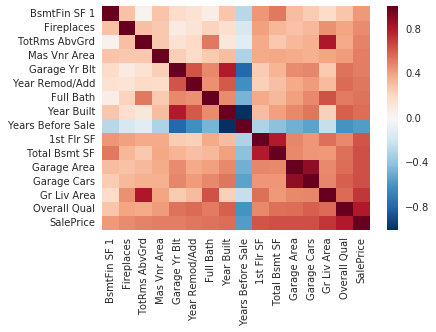

In [136]:
%matplotlib inline

sns.heatmap(transform_df.corr())

The heatmap above shows us that:

1. `Gr Liv Area` and `TotRms AbvGrd` are strongly correlated.
2. `Garage Area` and `Garage Cars` are strongly correlated.

The documentation tells us that these features reflect very similar information. 

We'll therefore drop `TotRms AbvGrd` and `Garage Cars`, because `Gr Liv Area` and `Garage Area` are continuous variables that capture more nuance.

In [137]:
transform_df = transform_df.drop(['Garage Cars', 'TotRms AbvGrd'], axis = 1)

transform_df.shape

(2928, 14)

### Categorical Columns

Some columns from the original dataframe should be converted to the categorical type. 

We'll list these below:

In [138]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

We're interested in which of these columns are still with us in our `transform_df` dataframe.

In [139]:
transform_df_cat = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_df_cat.append(col)
        
len(transform_df_cat)

0

We see that none of these columns are with us anymore. We'll now update the `select_features` function to include the above code.

### Updating `select_features` function

In [140]:
def transform_features(df):
    # Removing columns with more than 15% missing values
    df_null_count = df.isnull().sum()
    df_null_count = df_null_count[df_null_count < 440] 
    df_filtered = df[df_null_count.index]
    
    # Modifying Numeric Columns
    numeric_filtered = df_filtered.select_dtypes(include=['float', 'int'])
    numeric_filtered = numeric_filtered.fillna(numeric_filtered.mean())
    
    # Modifying Text Columns
    text_filtered = df_filtered.select_dtypes(include=['object'])
    text_filtered = text_filtered.dropna(axis=1)
    
    # Concatenating Numeric and Text columns
    df_new = pd.concat([text_filtered, numeric_filtered], axis = 1)
    
    # Creating new columns, and dropping the 2 rows that had negative values there
    df_new['Years Before Sale'] = df_new['Yr Sold'] - df_new['Year Built']
    df_new['Years Since Remod'] = df_new['Year Remod/Add'] - df_new['Year Built']
    df_new = df_new[df_new['Years Before Sale'] >= 0]
    df_new = df_new[df_new['Years Since Remod'] >= 0]
    
    # Dropping unnecessary columns:
    df_new = df_new.drop(["PID", "Order"], axis=1)
    df_new = df_new.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

    return df_new

def select_features(df):
    df_numeric = df.select_dtypes(include=['int', 'float'])
    df_corr = df_numeric.corr()['SalePrice'].abs().sort_values()
    
    strong_corr = df_corr[df_corr > 0.4]

    new_df = df[strong_corr.index]
    new_df = new_df.drop(['Garage Cars', 'TotRms AbvGrd'], axis = 1)
    
    return new_df

def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    # Selecting only numeric columns, other than SalePrice    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])    
    
    numeric_features = numeric_train.columns.drop('SalePrice')
    
    # Instantiating model:
    lr = linear_model.LinearRegression()
    
    # Training:
    lr.fit(numeric_train[numeric_features], numeric_train['SalePrice'])
    
    # Predicting:
    train_predictions = lr.predict(numeric_test[numeric_features])
    
    # RMSE:
    rmse = mean_squared_error(train_predictions, numeric_test['SalePrice']) ** 0.5
    
    return rmse

We'll now test the above modified `select_features` function.

In [141]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

37974.776072336594

We see that the select_features function significantly improved the rmse.

Next, we'll use simple validation to calculate the rmse.

## Cross Validation

The `train_and_test` function will be modified to accept a parameter `k` which controls the type of cross validation that occurs, which accepts integer values, but has a default value of 0.

When k = 0 , holdout validation will be performed, which is what the function already does. 

When k is 1, simple cross validation is performed, and then the rmse will be returned.

When k > 1, k-fold cross validation will be performed using k number of folds.

In [144]:
def train_and_test(df, k=0):
    
    # Identifying numeric columns, and setting them as features:
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    
    # Instantiating the model:
    lr = linear_model.LinearRegression()
    
    if k == 0: 
        # This is simply Holdout Validation
        train = df.iloc[:1460]
        test = df.iloc[1460:]
    
        # Training:
        lr.fit(train[features], train['SalePrice'])

        # Predicting:
        predictions = lr.predict(test[features])

        # RMSE:
        rmse = mean_squared_error(predictions, test['SalePrice']) ** 0.5
    
        return rmse
    
    elif k == 1: 
        
        # This is Simple Cross Validation, which means we do the test twice, 
        # the second time being with the train and test sets swapped.
        
        
        # First let's shuffle the dataframe:
        shuffled_df = df.sample(frac=1) # frac = 1 means returning the whole dataframe in a shuffled manner 
        
        # Splitting into two sets:
        train = shuffled_df[:1460]
        test = shuffled_df[1460:]
        
        # Training on train set, testing on test set.
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        # Here we Swap - Training on test set, testing on train set.
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        print(rmse_one)
        print(rmse_two)
        
        # Calculating and returning average rmse:
        avg_rmse = np.mean([rmse_one, rmse_two])
        return avg_rmse
        
    else: # k-fold cross validation, where k represents number of splits
        kf = KFold(n_splits=k, shuffle=True)
        rmse_vals = []
        
        # Split dataframe and iterate over each train and test set.
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            rmse = (mean_squared_error(test["SalePrice"], predictions)) ** 0.5
            print(rmse)
            rmse_vals.append(rmse)

        avg_rmse = np.mean(rmse_vals)
        return avg_rmse

Finally, we'll repeat the predictions using k-fold validation now, with k = 4.

In [146]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4) # Specifying k = 4

rmse

33272.63892241869
35593.68719122992
37839.5929174513
28708.35741897865


33853.56911251964

We observe that we managed to decrease the rmse to the 32,000-35,000 range with k-fold cross validation.